In [29]:
import numpy as np
import math
from sklearn.cluster.hierarchical import AgglomerativeClustering
from sklearn.cluster import SpectralClustering

import os  

import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.manifold import MDS

In [30]:
def word2vec(word):
    from collections import Counter
    from math import sqrt

    cw=Counter(word)
    sw=set(cw)
    lw=sqrt(sum(c*c for c in cw.values()))

    return cw,sw,lw

In [31]:
def cosdis(v1,v2):
    common=v1[1].intersection(v2[1])
    return sum(v1[0][ch]*v2[0][ch] for ch in common)/v1[2]/v2[2]

In [32]:
def align_score(str1, str2, m, n):
    gap=-10
    
    l=['A','R','N','D','C','Q','E','G','H','I','L','K','M','F','P','S','T','W','Y','V' ]
    
    blosum62 = [[4, -1, -2, -2, 0, -1, -1, 0, -2, -1, -1, -1, -1, -2, -1, 1, 0, -3, -2, 0],
            [-1, 5, 0, -2, -3, 1, 0, -2, 0, -3, -2, 2, -1, -3, -2, -1, -1, -3, -2, -3],
            [-2, 0, 6, 1, -3, 0, 0, 0, 1, -3, -3,  0, -2, -3, -2,  1,  0, -4, -2, -3 ],
            [-2, -2,  1,  6, -3,  0,  2, -1, -1, -3, -4, -1, -3, -3, -1,  0, -1, -4, -3, -3],
            [ 0, -3, -3, -3,  9, -3, -4, -3, -3, -1, -1, -3, -1, -2, -3, -1, -1, -2, -2, -1],
            [-1,  1,  0,  0, -3,  5,  2, -2,  0, -3, -2,  1,  0, -3, -1,  0, -1, -2, -1, -2],
            [-1,  0,  0,  2, -4,  2,  5, -2,  0, -3, -3,  1, -2, -3, -1,  0, -1, -3, -2, -2 ],
            [ 0, -2,  0, -1, -3, -2, -2,  6, -2, -4, -4, -2, -3, -3, -2,  0, -2, -2, -3, -3],
            [-2,  0,  1, -1, -3,  0,  0, -2,  8, -3, -3, -1, -2, -1, -2, -1, -2, -2,  2, -3],
            [-1, -3, -3, -3, -1, -3, -3, -4, -3,  4,  2, -3,  1,  0, -3, -2, -1, -3, -1,  3],
            [-1, -2, -3, -4, -1, -2, -3, -4, -3,  2,  4, -2,  2,  0, -3, -2, -1, -2, -1,  1],
            [-1,  2,  0, -1, -3,  1,  1, -2, -1, -3, -2,  5, -1, -3, -1,  0, -1, -3, -2, -2,],
            [-1, -1, -2, -3, -1,  0, -2, -3, -2,  1,  2, -1,  5,  0, -2, -1, -1, -1, -1,  1],
            [-2, -3, -3, -3, -2, -3, -3, -3, -1,  0,  0, -3,  0,  6, -4, -2, -2,  1,  3, -1],
            [-1, -2, -2, -1, -3, -1, -1, -2, -2, -3, -3, -1, -2, -4,  7, -1, -1, -4, -3, -2],
            [1, -1,  1,  0, -1,  0,  0,  0, -1, -2, -2,  0, -1, -2, -1,  4,  1, -3, -2, -2],
            [0, -1,  0, -1, -1, -1, -1, -2, -2, -1, -1, -1, -1 ,-2, -1,  1,  5, -2, -2,  0],
            [-3, -3, -4, -4, -2, -2, -3, -2, -2, -3, -2, -3, -1,  1, -4, -3, -2, 11,  2, -3],
            [-2, -2, -2, -3, -2, -1, -2, -3 , 2, -1, -1, -2, -1,  3, -3, -2, -2,  2,  7, -1],
            [0, -3, -3, -3, -1, -2, -2, -3, -3,  3,  1, -2,  1, -1, -2, -2,  0, -3, -1,  4, -3]
        ]


   
    dp = [[0 for x in range(n + 1)] for x in range(m + 1)] 
  
 
    for i in range(m + 1): 
        for j in range(n + 1): 

            if i == 0: 
                dp[i][j] = j*gap   
            elif j == 0: 
                dp[i][j] = i*gap    
            elif str1[i-1] == str2[j-1]: 
                dp[i][j] = max( dp[i-1][j-1]+blosum62[ l.index( str1[i-1] ) ][  l.index( str2[j-1] ) ], dp[i-1][j]+gap, dp[i][j-1]+gap ) 
  
            elif str1[i-1]!=str2[j-1]: 
                dp[i][j] = max( dp[i-1][j-1]+blosum62[ l.index( str1[i-1] ) ][  l.index( str2[j-1] ) ], dp[i-1][j]+gap, dp[i][j-1]+gap )    
  
    #print(dp)
    #return dp[m][n] 

    #row string
    row_string=['*']
    for ele in str1:
        row_string.append(ele)

    #column string
    col_string=["*"]
    for ele in str2:
        col_string.append(ele)
    
    #print(row_string)
    #print(col_string)

    i,j=m,n
    align_str1=''
    align_str2=''

    while i>0 or j>0:
            if dp[i-1][j-1]>=dp[i-1][j] and dp[i-1][j-1]>=dp[i][j-1]:
                align_str1=align_str1+row_string[i]
                align_str2=align_str2+col_string[j]

                i=i-1
                j=j-1
            
            elif dp[i][j-1]>=dp[i-1][j-1] and dp[i][j-1]>=dp[i-1][j]:
                align_str2=align_str2+col_string[j]
                align_str1=align_str1+'*'

                i=i
                j=j-1

            elif dp[i-1][j]>dp[i-1][j-1] and dp[i-1][j]>dp[i][j-1]:
                align_str1=align_str1+row_string[i]
                align_str2=align_str2+'*'

                i=i-1
                j=j

            
    
    str1=align_str1[::-1]
    str2=align_str2[::-1]

    v_str1=word2vec(str1)
    v_str2=word2vec(str2)

    return cosdis(v_str1,v_str2)

In [33]:
import pandas as pd

In [34]:
data=pd.read_csv('D:\Shruti\IIT Bombay internship\datasets_for_practice\proteins.csv')

In [35]:
data.head()

,structureId,chainId,sequence,residueCount,macromoleculeType
0,101M,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,154,Protein
1,102L,A,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAAKSE...,165,Protein
2,102M,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,154,Protein
3,103L,A,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNSLDAAK...,167,Protein
4,103M,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,154,Protein


In [36]:
data.isnull().sum()

structureId          0
chainId              2
sequence             3
residueCount         0
macromoleculeType    0
dtype: int64

In [37]:
data = data[pd.notnull(data['sequence'])]
data = data[pd.notnull(data['chainId'])]
data.isnull().sum()

structureId          0
chainId              0
sequence             0
residueCount         0
macromoleculeType    0
dtype: int64

In [38]:
index_to_drop = data.loc[data['sequence'].str.contains('(^XXXX)+')].index

C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


In [39]:
data.drop(index = index_to_drop, inplace = True)
data.shape

(343821, 5)

In [40]:
index_to_drop = data.loc[data['sequence'].str.contains('[A-Z]*B[A-Z]*')].index

In [41]:
data.drop(index = index_to_drop, inplace = True)
data.shape

(343815, 5)

In [42]:
index_to_drop = data.loc[data['sequence'].str.contains('[A-Z]*J[A-Z]*')].index

In [43]:
data.drop(index = index_to_drop, inplace = True)
data.shape

(343815, 5)

In [44]:
index_to_drop = data.loc[data['sequence'].str.contains('[A-Z]*U[A-Z]*')].index

In [45]:
data.drop(index = index_to_drop, inplace = True)
data.shape

(343757, 5)

In [46]:
index_to_drop = data.loc[data['sequence'].str.contains('[A-Z]*X[A-Z]*')].index

In [47]:
data.drop(index = index_to_drop, inplace = True)
data.shape

(337313, 5)

In [48]:
index_to_drop = data.loc[data['sequence'].str.contains('[A-Z]*Z[A-Z]*')].index

In [49]:
data.drop(index = index_to_drop, inplace = True)
data.shape

(337309, 5)

In [50]:
index_to_drop = data.loc[data['sequence'].str.contains('[A-Z]*O[A-Z]*')].index

In [51]:
data.drop(index = index_to_drop, inplace = True)
data.shape

(337307, 5)

In [52]:
df_prot=data[data['residueCount']>20]

In [53]:
df_prot.shape

(336782, 5)

In [54]:
df_prot_fin=df_prot[0:100]

In [55]:
n=len(df_prot_fin)

In [56]:
n

100

In [58]:
arr=np.empty([n,n])
print(df_prot_fin.head(5))

  structureId chainId                                           sequence  \
0        101M       A  MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...   
1        102L       A  MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAAKSE...   
2        102M       A  MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...   
3        103L       A  MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNSLDAAK...   
4        103M       A  MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...   

   residueCount macromoleculeType  
0           154           Protein  
1           165           Protein  
2           154           Protein  
3           167           Protein  
4           154           Protein  


In [59]:
#Similarity calculated after finding the global alignment and then calculating cosine similarity b/w strings
for i in range(0,n):
    for j in range(0,n):
        if i==j:
            arr[i][j]=0
        else:
            if i<j:
                a=i
                b=j
            else:
                a=j
                b=i
            arr[i][j]=align_score(df_prot_fin.iloc[a][2],df_prot_fin.iloc[b][2],len(df_prot_fin.iloc[a][2]),len(df_prot_fin.iloc[b][2]))
            

In [60]:
arr

array([[0.        , 0.87046632, 0.99889335, ..., 0.86556525, 0.86766118,
        0.44637099],
       [0.87046632, 0.        , 0.8774119 , ..., 0.99889074, 0.99889151,
        0.55499218],
       [0.99889335, 0.8774119 , 0.        , ..., 0.87086412, 0.87288947,
        0.44570963],
       ...,
       [0.86556525, 0.99889074, 0.87086412, ..., 0.        , 0.99944552,
        0.54793068],
       [0.86766118, 0.99889151, 0.87288947, ..., 0.99944552, 0.        ,
        0.55203207],
       [0.44637099, 0.55499218, 0.44570963, ..., 0.54793068, 0.55203207,
        0.        ]])

In [61]:
arr.shape

(100, 100)

In [62]:
MDS()

MDS(dissimilarity='euclidean', eps=0.001, max_iter=300, metric=True,
  n_components=2, n_init=4, n_jobs=None, random_state=None, verbose=0)

In [63]:
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

pos = mds.fit_transform(arr)  # shape (n_components, n_samples)

xs, ys = pos[:, 0], pos[:, 1]

In [64]:
model = AgglomerativeClustering(affinity='precomputed', n_clusters=5, linkage='complete').fit(arr)
print(model.labels_)
print()

[3 0 1 2 0 4 0 2 1 4 1 0 3 3 4 0 3 1 0 4 0 1 0 1 1 1 2 2 1 2 0 4 4 3 2 4 4
 2 4 1 3 4 3 0 0 1 2 3 1 3 3 0 4 4 3 0 3 1 4 3 1 0 1 4 0 0 4 0 4 2 1 0 3 3
 4 0 0 4 2 3 1 1 2 4 1 1 0 1 2 3 2 1 0 1 4 3 3 1 2 1]



In [65]:
cluster_colors = {0: '#1b9e77', 1: '#d95f02', 2: '#7570b3', 3: '#e7298a', 4: '#66a61e'}

In [66]:
cluster_names = {0: 'G1', 
                 1: 'G2', 
                 2: 'G3', 
                 3: 'G4', 
                 4: 'G5'}

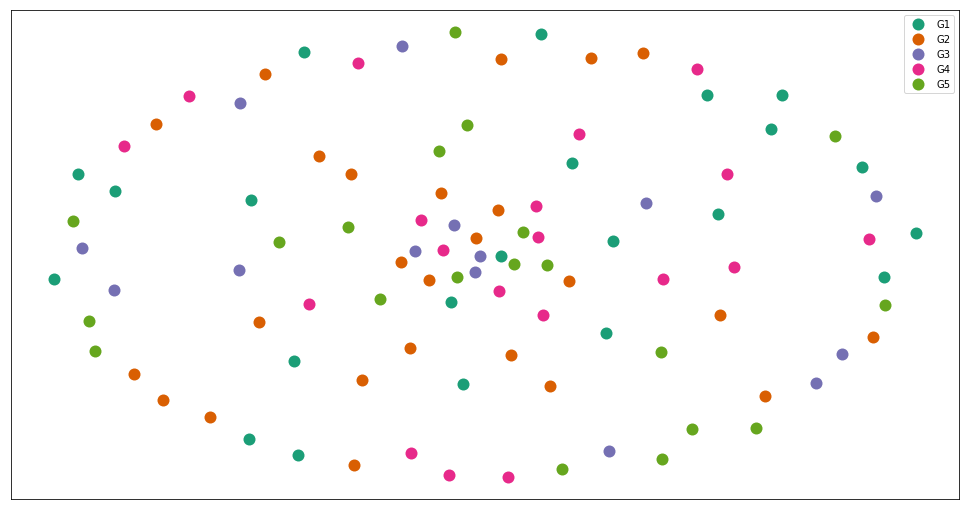

In [67]:
df=pd.DataFrame(dict(x=xs, y=ys, label=model.labels_))

groups = df.groupby('label')
# set up plot
fig, ax = plt.subplots(figsize=(17, 9)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, 
            label=cluster_names[name], color=cluster_colors[name], 
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False)
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelleft=False)
    
ax.legend(numpoints=1)  #show legend with only 1 point

plt.show()



In [68]:
arr.shape

(100, 100)

In [69]:
spectral_model = SpectralClustering(n_clusters = 5, affinity ='precomputed') 
labels_spec = spectral_model.fit_predict(arr)
print(labels_spec)

[3 0 3 0 3 0 0 3 3 3 0 3 0 3 0 3 4 4 0 3 0 3 0 3 0 0 0 4 4 0 0 2 2 1 1 1 1
 4 4 0 0 0 0 0 0 0 0 0 2 2 4 4 4 4 4 4 4 0 0 1 1 1 1 0 0 0 0 4 4 2 2 2 2 0
 0 0 0 0 0 0 0 0 3 0 4 4 0 0 0 0 0 0 0 0 0 0 0 0 0 4]


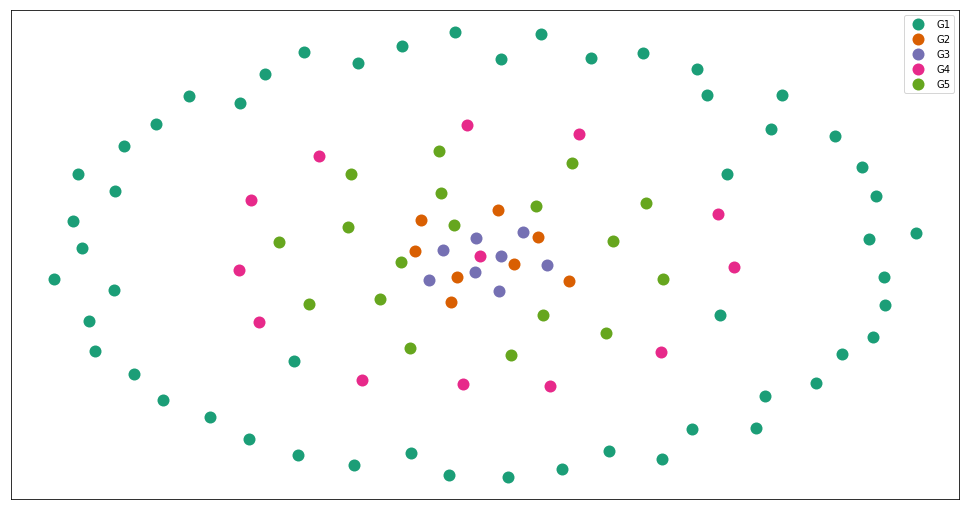

In [70]:
df=pd.DataFrame(dict(x=xs, y=ys,label= labels_spec))

groups = df.groupby('label')


# set up plot
fig, ax = plt.subplots(figsize=(17, 9)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, 
            label=cluster_names[name], color=cluster_colors[name], 
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False)
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelleft=False)
    
ax.legend(numpoints=1)  #show legend with only 1 point

plt.show()

In [71]:
from sklearn.metrics import silhouette_score

In [72]:
sil_sc=silhouette_score(arr,model.labels_ , metric="precomputed")

In [73]:
sil_sc

-0.03837912774047069

In [74]:
no_of_clusters = range(5,25) 
  
for n_clusters in no_of_clusters: 
  
    model = AgglomerativeClustering(affinity='precomputed', n_clusters=n_clusters, linkage='complete').fit(arr)
    cluster_labels=model.labels_
    
  
    
    silhouette_avg = silhouette_score(arr, cluster_labels, metric='precomputed') 
  
    print("For no of clusters =", n_clusters, 
          " The average silhouette_score is :", silhouette_avg)

For no of clusters = 5  The average silhouette_score is : -0.03837912774047069
For no of clusters = 6  The average silhouette_score is : -0.0457347095963709
For no of clusters = 7  The average silhouette_score is : -0.04050532691897977
For no of clusters = 8  The average silhouette_score is : -0.03345439852087929
For no of clusters = 9  The average silhouette_score is : -0.039402030498936265
For no of clusters = 10  The average silhouette_score is : -0.044751226422089854
For no of clusters = 11  The average silhouette_score is : -0.0445441229016345
For no of clusters = 12  The average silhouette_score is : -0.050377157339961585
For no of clusters = 13  The average silhouette_score is : -0.05064015724599479
For no of clusters = 14  The average silhouette_score is : -0.07151971943821007
For no of clusters = 15  The average silhouette_score is : -0.06874185696355777
For no of clusters = 16  The average silhouette_score is : -0.06803359619304673
For no of clusters = 17  The average silhoue

In [151]:
sil_sc=silhouette_score(arr,labels_spec , metric="precomputed")

In [152]:
sil_sc

-0.6502752474607093

no_of_clusters = range(5,25) 
  
for n_clusters in no_of_clusters: 
  
    spectral_model = SpectralClustering(n_clusters = 5, affinity ='precomputed') 
    labels_spec = spectral_model.fit_predict(arr)
    
  
    
    silhouette_avg = silhouette_score(arr, labels_spec, metric='precomputed') 
  
    print("For no of clusters =", n_clusters, 
          " The average silhouette_score is :", silhouette_avg)

In [76]:
def align_score(str1, str2, m, n):
    """Calculate global alignment score using BLOSUM62 and use the last value"""
    gap=-10
    
    l=['A','R','N','D','C','Q','E','G','H','I','L','K','M','F','P','S','T','W','Y','V' ]
    
    blosum62 = [[4, -1, -2, -2, 0, -1, -1, 0, -2, -1, -1, -1, -1, -2, -1, 1, 0, -3, -2, 0],
            [-1, 5, 0, -2, -3, 1, 0, -2, 0, -3, -2, 2, -1, -3, -2, -1, -1, -3, -2, -3],
            [-2, 0, 6, 1, -3, 0, 0, 0, 1, -3, -3,  0, -2, -3, -2,  1,  0, -4, -2, -3 ],
            [-2, -2,  1,  6, -3,  0,  2, -1, -1, -3, -4, -1, -3, -3, -1,  0, -1, -4, -3, -3],
            [ 0, -3, -3, -3,  9, -3, -4, -3, -3, -1, -1, -3, -1, -2, -3, -1, -1, -2, -2, -1],
            [-1,  1,  0,  0, -3,  5,  2, -2,  0, -3, -2,  1,  0, -3, -1,  0, -1, -2, -1, -2],
            [-1,  0,  0,  2, -4,  2,  5, -2,  0, -3, -3,  1, -2, -3, -1,  0, -1, -3, -2, -2 ],
            [ 0, -2,  0, -1, -3, -2, -2,  6, -2, -4, -4, -2, -3, -3, -2,  0, -2, -2, -3, -3],
            [-2,  0,  1, -1, -3,  0,  0, -2,  8, -3, -3, -1, -2, -1, -2, -1, -2, -2,  2, -3],
            [-1, -3, -3, -3, -1, -3, -3, -4, -3,  4,  2, -3,  1,  0, -3, -2, -1, -3, -1,  3],
            [-1, -2, -3, -4, -1, -2, -3, -4, -3,  2,  4, -2,  2,  0, -3, -2, -1, -2, -1,  1],
            [-1,  2,  0, -1, -3,  1,  1, -2, -1, -3, -2,  5, -1, -3, -1,  0, -1, -3, -2, -2,],
            [-1, -1, -2, -3, -1,  0, -2, -3, -2,  1,  2, -1,  5,  0, -2, -1, -1, -1, -1,  1],
            [-2, -3, -3, -3, -2, -3, -3, -3, -1,  0,  0, -3,  0,  6, -4, -2, -2,  1,  3, -1],
            [-1, -2, -2, -1, -3, -1, -1, -2, -2, -3, -3, -1, -2, -4,  7, -1, -1, -4, -3, -2],
            [1, -1,  1,  0, -1,  0,  0,  0, -1, -2, -2,  0, -1, -2, -1,  4,  1, -3, -2, -2],
            [0, -1,  0, -1, -1, -1, -1, -2, -2, -1, -1, -1, -1 ,-2, -1,  1,  5, -2, -2,  0],
            [-3, -3, -4, -4, -2, -2, -3, -2, -2, -3, -2, -3, -1,  1, -4, -3, -2, 11,  2, -3],
            [-2, -2, -2, -3, -2, -1, -2, -3 , 2, -1, -1, -2, -1,  3, -3, -2, -2,  2,  7, -1],
            [0, -3, -3, -3, -1, -2, -2, -3, -3,  3,  1, -2,  1, -1, -2, -2,  0, -3, -1,  4, -3]
        ]


   
    dp = [[0 for x in range(n + 1)] for x in range(m + 1)] 
  
 
    for i in range(m + 1): 
        for j in range(n + 1): 

            if i == 0: 
                dp[i][j] = j*gap   
            elif j == 0: 
                dp[i][j] = i*gap    
            elif str1[i-1] == str2[j-1]: 
                dp[i][j] = max( dp[i-1][j-1]+blosum62[ l.index( str1[i-1] ) ][  l.index( str2[j-1] ) ], dp[i-1][j]+gap, dp[i][j-1]+gap ) 
  
            elif str1[i-1]!=str2[j-1]: 
                dp[i][j] = max( dp[i-1][j-1]+blosum62[ l.index( str1[i-1] ) ][  l.index( str2[j-1] ) ], dp[i-1][j]+gap, dp[i][j-1]+gap )    
  
    return dp[m][n] 

In [77]:
#Similarity calculated after finding the global alignment score
for i in range(0,n):
    for j in range(0,n):
        if i==j:
            arr[i][j]=0
        else:
            if i<j:
                a=i
                b=j
            else:
                a=j
                b=i
            arr[i][j]=align_score(df_prot_fin.iloc[a][2],df_prot_fin.iloc[b][2],len(df_prot_fin.iloc[a][2]),len(df_prot_fin.iloc[b][2]))
            

In [78]:
model = AgglomerativeClustering(affinity='precomputed', n_clusters=5, linkage='complete').fit(arr)
print(model.labels_)
print()

[0 0 4 4 0 3 1 1 2 1 2 3 1 0 0 0 0 0 4 1 0 0 0 1 0 1 3 0 1 0 2 4 0 1 2 3 4
 0 2 0 2 0 0 1 1 0 0 1 1 2 1 4 2 1 2 1 4 4 3 0 2 0 1 0 0 0 1 0 1 0 1 2 3 4
 0 1 0 2 0 0 1 1 0 3 3 0 0 0 1 0 1 0 0 1 0 0 1 2 4 3]



In [80]:
arr

array([[   0., -106.,  782., ..., -101., -101., -457.],
       [-106.,    0., -109., ...,  821.,  818., -388.],
       [ 782., -109.,    0., ..., -102., -102., -458.],
       ...,
       [-101.,  821., -102., ...,    0.,  830., -396.],
       [-101.,  818., -102., ...,  830.,    0., -393.],
       [-457., -388., -458., ..., -396., -393.,    0.]])

In [81]:
beta=10
similarity = np.exp(-beta * arr / arr.std())
print(similarity)

[[1.00000000e+00 3.47517770e+00 1.02098324e-04 ... 3.27687015e+00
  3.27687015e+00 2.14944056e+02]
 [3.47517770e+00 1.00000000e+00 3.59987721e+00 ... 6.45624346e-05
  6.68791230e-05 9.55388531e+01]
 [1.02098324e-04 3.59987721e+00 1.00000000e+00 ... 3.31560503e+00
  3.31560503e+00 2.17484844e+02]
 ...
 [3.27687015e+00 6.45624346e-05 3.31560503e+00 ... 1.00000000e+00
  5.80828460e-05 1.04956292e+02]
 [3.27687015e+00 6.68791230e-05 3.31560503e+00 ... 5.80828460e-05
  1.00000000e+00 1.01320613e+02]
 [2.14944056e+02 9.55388531e+01 2.17484844e+02 ... 1.04956292e+02
  1.01320613e+02 1.00000000e+00]]


In [82]:
model = AgglomerativeClustering(affinity='precomputed', n_clusters=5, linkage='average').fit(similarity)
print(model.labels_)
print()

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 4 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 1 1
 4 4 1 1 1 1 1 1 1 1 1 0 0 0 4 4 4 4 4 4 1 1 1 1 1 1 1 1 1 1 4 4 3 3 3 3 1
 1 1 1 1 1 1 1 1 2 1 4 4 1 1 1 1 1 1 1 1 1 1 1 1 1 4]



In [83]:
no_of_clusters = range(5,25) 
  
for n_clusters in no_of_clusters: 
  
    model = AgglomerativeClustering(affinity='precomputed', n_clusters=n_clusters, linkage='average').fit(arr)
    cluster_labels=model.labels_
    
  
    
    silhouette_avg = silhouette_score(arr, cluster_labels, metric='precomputed') 
  
    print("For no of clusters =", n_clusters, 
          " The average silhouette_score is :", silhouette_avg)

For no of clusters = 5  The average silhouette_score is : 0.1204903859546943
For no of clusters = 6  The average silhouette_score is : 0.11313855998958404
For no of clusters = 7  The average silhouette_score is : 0.10569432629754377
For no of clusters = 8  The average silhouette_score is : 0.09856050080964542
For no of clusters = 9  The average silhouette_score is : 0.09124921483953345
For no of clusters = 10  The average silhouette_score is : 0.08312197624236345
For no of clusters = 11  The average silhouette_score is : 0.07496750100327265
For no of clusters = 12  The average silhouette_score is : 0.06645873465350834
For no of clusters = 13  The average silhouette_score is : 0.058607905829169145
For no of clusters = 14  The average silhouette_score is : 0.0496032180463828
For no of clusters = 15  The average silhouette_score is : 0.04034976816190234
For no of clusters = 16  The average silhouette_score is : 0.03144433504916753
For no of clusters = 17  The average silhouette_score is :

In [84]:
no_of_clusters = range(5,25) 
  
for n_clusters in no_of_clusters: 
  
    model = AgglomerativeClustering(affinity='precomputed', n_clusters=n_clusters, linkage='average').fit(similarity)
    cluster_labels=model.labels_
    
  
    
    silhouette_avg = silhouette_score(arr, cluster_labels, metric='precomputed') 
  
    print("For no of clusters =", n_clusters, 
          " The average silhouette_score is :", silhouette_avg)

For no of clusters = 5  The average silhouette_score is : -83.51185750468292
For no of clusters = 6  The average silhouette_score is : -16.189663982386463
For no of clusters = 7  The average silhouette_score is : -8.12964903799786
For no of clusters = 8  The average silhouette_score is : -8.17746588193318
For no of clusters = 9  The average silhouette_score is : -7.5246585942846185
For no of clusters = 10  The average silhouette_score is : -8.853015355842027
For no of clusters = 11  The average silhouette_score is : -3.9071606704979147
For no of clusters = 12  The average silhouette_score is : -4.142040641070795
For no of clusters = 13  The average silhouette_score is : -3.5757603673981344
For no of clusters = 14  The average silhouette_score is : -3.425805089154027
For no of clusters = 15  The average silhouette_score is : -3.378787755364249
For no of clusters = 16  The average silhouette_score is : -3.330945493459487
For no of clusters = 17  The average silhouette_score is : -3.28310

In [87]:
no_of_clusters = range(5,25) 
  
for n_clusters in no_of_clusters: 
  
    spectral_model = SpectralClustering(n_clusters = n_clusters, affinity ='precomputed') 
    labels_spec = spectral_model.fit_predict(similarity)
    
  
    
    silhouette_avg = silhouette_score(arr, labels_spec, metric='precomputed') 
  
    print("For no of clusters =", n_clusters, 
          " The average silhouette_score is :", silhouette_avg)

For no of clusters = 5  The average silhouette_score is : -1.510831107046333
For no of clusters = 6  The average silhouette_score is : -1.7704241675213692
For no of clusters = 7  The average silhouette_score is : -1.0651034256989638
For no of clusters = 8  The average silhouette_score is : -1.0424019654724659
For no of clusters = 9  The average silhouette_score is : -0.08629474402857977
For no of clusters = 10  The average silhouette_score is : -1.046555648857498
For no of clusters = 11  The average silhouette_score is : -2.7015362670054333


LinAlgError: 9-th leading minor of the array is not positive definite

Now use The local alignment

In [88]:
import scipy.stats

def max_value(inputlist):
    m=0
    for i in inputlist:
        m=max(max(i),m)
    return m

def align_score(str1, str2, m, n):
    """Finding the local alignment score and then calculating the Z score"""
    gap=-10
    
    l=['A','R','N','D','C','Q','E','G','H','I','L','K','M','F','P','S','T','W','Y','V' ]
    
    blosum62 = [[4, -1, -2, -2, 0, -1, -1, 0, -2, -1, -1, -1, -1, -2, -1, 1, 0, -3, -2, 0],
            [-1, 5, 0, -2, -3, 1, 0, -2, 0, -3, -2, 2, -1, -3, -2, -1, -1, -3, -2, -3],
            [-2, 0, 6, 1, -3, 0, 0, 0, 1, -3, -3,  0, -2, -3, -2,  1,  0, -4, -2, -3 ],
            [-2, -2,  1,  6, -3,  0,  2, -1, -1, -3, -4, -1, -3, -3, -1,  0, -1, -4, -3, -3],
            [ 0, -3, -3, -3,  9, -3, -4, -3, -3, -1, -1, -3, -1, -2, -3, -1, -1, -2, -2, -1],
            [-1,  1,  0,  0, -3,  5,  2, -2,  0, -3, -2,  1,  0, -3, -1,  0, -1, -2, -1, -2],
            [-1,  0,  0,  2, -4,  2,  5, -2,  0, -3, -3,  1, -2, -3, -1,  0, -1, -3, -2, -2 ],
            [ 0, -2,  0, -1, -3, -2, -2,  6, -2, -4, -4, -2, -3, -3, -2,  0, -2, -2, -3, -3],
            [-2,  0,  1, -1, -3,  0,  0, -2,  8, -3, -3, -1, -2, -1, -2, -1, -2, -2,  2, -3],
            [-1, -3, -3, -3, -1, -3, -3, -4, -3,  4,  2, -3,  1,  0, -3, -2, -1, -3, -1,  3],
            [-1, -2, -3, -4, -1, -2, -3, -4, -3,  2,  4, -2,  2,  0, -3, -2, -1, -2, -1,  1],
            [-1,  2,  0, -1, -3,  1,  1, -2, -1, -3, -2,  5, -1, -3, -1,  0, -1, -3, -2, -2,],
            [-1, -1, -2, -3, -1,  0, -2, -3, -2,  1,  2, -1,  5,  0, -2, -1, -1, -1, -1,  1],
            [-2, -3, -3, -3, -2, -3, -3, -3, -1,  0,  0, -3,  0,  6, -4, -2, -2,  1,  3, -1],
            [-1, -2, -2, -1, -3, -1, -1, -2, -2, -3, -3, -1, -2, -4,  7, -1, -1, -4, -3, -2],
            [1, -1,  1,  0, -1,  0,  0,  0, -1, -2, -2,  0, -1, -2, -1,  4,  1, -3, -2, -2],
            [0, -1,  0, -1, -1, -1, -1, -2, -2, -1, -1, -1, -1 ,-2, -1,  1,  5, -2, -2,  0],
            [-3, -3, -4, -4, -2, -2, -3, -2, -2, -3, -2, -3, -1,  1, -4, -3, -2, 11,  2, -3],
            [-2, -2, -2, -3, -2, -1, -2, -3 , 2, -1, -1, -2, -1,  3, -3, -2, -2,  2,  7, -1],
            [0, -3, -3, -3, -1, -2, -2, -3, -3,  3,  1, -2,  1, -1, -2, -2,  0, -3, -1,  4, -3]
        ]


   
    dp = [[0 for x in range(n + 1)] for x in range(m + 1)] 
  
 
    for i in range(m + 1): 
        for j in range(n + 1): 

            if i == 0: 
                dp[i][j] = 0   
            elif j == 0: 
                dp[i][j] = 0    
            elif str1[i-1] == str2[j-1]: 
                dp[i][j] = max( dp[i-1][j-1]+blosum62[ l.index( str1[i-1] ) ][  l.index( str2[j-1] ) ], dp[i-1][j]+gap, dp[i][j-1]+gap,0 ) 
  
            elif str1[i-1]!=str2[j-1]: 
                dp[i][j] = max( dp[i-1][j-1]+blosum62[ l.index( str1[i-1] ) ][  l.index( str2[j-1] ) ], dp[i-1][j]+gap, dp[i][j-1]+gap,0 )    
    #print(dp)
    #print(scipy.stats.zscore(dp,axis=None))
    return max_value(scipy.stats.zscore(dp,axis=None)) 

In [89]:
#Similarity calculated after finding the local alignment normalized score
for i in range(0,n):
    for j in range(0,n):
        if i==j:
            arr[i][j]=0
        else:
            if i<j:
                a=i
                b=j
            else:
                a=j
                b=i
            arr[i][j]=align_score(df_prot_fin.iloc[a][2],df_prot_fin.iloc[b][2],len(df_prot_fin.iloc[a][2]),len(df_prot_fin.iloc[b][2]))
            

In [91]:
no_of_clusters = range(5,25) 
  
for n_clusters in no_of_clusters: 
  
    model = AgglomerativeClustering(affinity='precomputed', n_clusters=n_clusters, linkage='complete').fit(arr)
    cluster_labels=model.labels_
    
  
    
    silhouette_avg = silhouette_score(arr, cluster_labels, metric='precomputed') 
  
    print("For no of clusters =", n_clusters, 
          " The average silhouette_score is :", silhouette_avg)

For no of clusters = 5  The average silhouette_score is : 0.2702839190922901
For no of clusters = 6  The average silhouette_score is : 0.3572859430170579
For no of clusters = 7  The average silhouette_score is : 0.35666544451830845
For no of clusters = 8  The average silhouette_score is : 0.35742354550518274
For no of clusters = 9  The average silhouette_score is : 0.3805423539749556
For no of clusters = 10  The average silhouette_score is : 0.3960287247293733
For no of clusters = 11  The average silhouette_score is : 0.39198424375665775
For no of clusters = 12  The average silhouette_score is : 0.4035399291159083
For no of clusters = 13  The average silhouette_score is : 0.40450823331680397
For no of clusters = 14  The average silhouette_score is : 0.39065982313972486
For no of clusters = 15  The average silhouette_score is : 0.3821225474806416
For no of clusters = 16  The average silhouette_score is : 0.1978057736116009
For no of clusters = 17  The average silhouette_score is : 0.126

In [93]:
no_of_clusters = range(5,25) 
  
for n_clusters in no_of_clusters: 
  
    model = AgglomerativeClustering(affinity='precomputed', n_clusters=n_clusters, linkage='average').fit(arr)
    cluster_labels=model.labels_
    
  
    
    silhouette_avg = silhouette_score(arr, cluster_labels, metric='precomputed') 
  
    print("For no of clusters =", n_clusters, 
          " The average silhouette_score is :", silhouette_avg)

For no of clusters = 5  The average silhouette_score is : 0.2913400756535742
For no of clusters = 6  The average silhouette_score is : 0.28265654184723554
For no of clusters = 7  The average silhouette_score is : 0.2972297151225642
For no of clusters = 8  The average silhouette_score is : 0.3183349810409675
For no of clusters = 9  The average silhouette_score is : 0.322248941782312
For no of clusters = 10  The average silhouette_score is : 0.4060656095146078
For no of clusters = 11  The average silhouette_score is : 0.41450791938066706
For no of clusters = 12  The average silhouette_score is : 0.4119708528604191
For no of clusters = 13  The average silhouette_score is : 0.41212296281443195
For no of clusters = 14  The average silhouette_score is : 0.32116741529762194
For no of clusters = 15  The average silhouette_score is : 0.31529141024835405
For no of clusters = 16  The average silhouette_score is : 0.1350551829130038
For no of clusters = 17  The average silhouette_score is : 0.1302

In [95]:
no_of_clusters = range(5,25) 
  
for n_clusters in no_of_clusters: 
  
    spectral_model = SpectralClustering(n_clusters = n_clusters, affinity ='precomputed') 
    labels_spec = spectral_model.fit_predict(arr)
    
  
    
    silhouette_avg = silhouette_score(arr, labels_spec, metric='precomputed') 
  
    print("For no of clusters =", n_clusters, 
          " The average silhouette_score is :", silhouette_avg)

For no of clusters = 5  The average silhouette_score is : -0.19304181349906266
For no of clusters = 6  The average silhouette_score is : -0.22892443933984258
For no of clusters = 7  The average silhouette_score is : -0.23448073355524607
For no of clusters = 8  The average silhouette_score is : -0.2142436185185734
For no of clusters = 9  The average silhouette_score is : -0.20977478128261773
For no of clusters = 10  The average silhouette_score is : -0.21803487476085257
For no of clusters = 11  The average silhouette_score is : -0.09771463302908603
For no of clusters = 12  The average silhouette_score is : -0.18517192835854623
For no of clusters = 13  The average silhouette_score is : -0.18511198709918417
For no of clusters = 14  The average silhouette_score is : -0.18351132267507733
For no of clusters = 15  The average silhouette_score is : -0.18953946084328013
For no of clusters = 16  The average silhouette_score is : -0.17628873558171468
For no of clusters = 17  The average silhouett